<a href="https://colab.research.google.com/github/ritesh-bhandaria/denoising-autoencoders/blob/main/denoising_AE_20BCS183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
data=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train,_), (x_test,_)= data

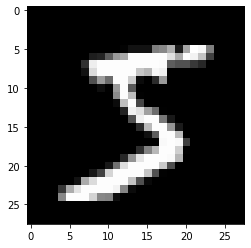

In [ ]:
plt.imshow(x_train[0],cmap="gray")

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
noise_factor=0.1
x_train_noise=x_train + noise_factor * np.random.normal(loc=0.,scale=1.,size=x_train.shape)
x_test_noise=x_test + noise_factor * np.random.normal(loc=0.,scale=1.,size=x_test.shape)


In [ ]:
x_train_noise.shape 

(60000, 28, 28)

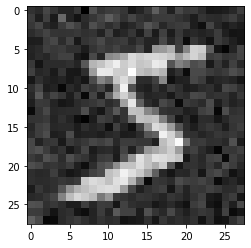

In [ ]:
plt.imshow(x_train_noise[0],cmap="gray")

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

x_train_noise=x_train_noise.reshape(x_train_noise.shape[0],28,28,1)
x_test_noise=x_test_noise.reshape(x_test_noise.shape[0],28,28,1)

x_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras.models import Model
from keras import layers
import tensorflow as tf

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
#encoder
input = layers.Input(shape=x_train.shape[1:])
x= layers.Conv2D(32,(3,3),activation='relu',padding='same')(input)
x=BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x=BatchNormalization()(x)
encoded=layers.MaxPool2D(pool_size=(2, 2), padding="same")(x)


In [ ]:
from keras.layers.convolutional import UpSampling2D

x= layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=BatchNormalization()(x)
x = UpSampling2D()(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x=BatchNormalization()(x)
x= UpSampling2D()(x)
decoded= layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)


In [ ]:
autoencoder= Model(input, decoded, name="denoising")
autoencoder.summary()

Model: "denoising"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       12

In [ ]:
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint= ModelCheckpoint("denoising.h5", save_best_only=True, save_weights_only=False,verbose=1)
history=autoencoder.fit(x_train_noise,x_train,batch_size=128,epochs=10,callbacks=checkpoint,validation_split=0.25,verbose=2)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.16670, saving model to denoising.h5
352/352 - 113s - loss: 0.1562 - val_loss: 0.1667 - 113s/epoch - 321ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.16670 to 0.07472, saving model to denoising.h5
352/352 - 112s - loss: 0.0759 - val_loss: 0.0747 - 112s/epoch - 318ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.07472
352/352 - 112s - loss: 0.0735 - val_loss: 0.0759 - 112s/epoch - 318ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.07472 to 0.07190, saving model to denoising.h5
352/352 - 112s - loss: 0.0718 - val_loss: 0.0719 - 112s/epoch - 317ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.07190 to 0.07142, saving model to denoising.h5
352/352 - 111s - loss: 0.0710 - val_loss: 0.0714 - 111s/epoch - 316ms/step
Epoch 6/10

Epoch 6: val_loss improved from 0.07142 to 0.07052, saving model to denoising.h5
352/352 - 112s - loss: 0.0704 - val_loss: 0.0705 - 112s/epoch - 318ms/step
Epoch 7/10

Epoch 7: val_loss 

In [ ]:
from keras.models import load_model
autoencoder=load_model("denoising.h5")
autoencoder.summary()

Model: "denoising"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       12

In [ ]:
def visualize(data,row,col):
  data=data.reshape(data.shape[0],28,28)
  count=0
  fig,axes=plt.subplots(row,col,figsize=(16,4))
  for i in range(row):
    for j in range(col):
      axes[i,j].imshow(data[count],cmap='gray')
      count+=1

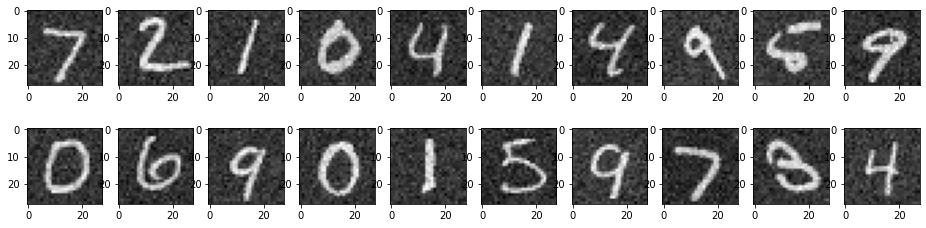

In [ ]:
visualize(x_test_noise[:20],2,10)

In [ ]:
pred=autoencoder.predict(x_test_noise[:20])
pred.shape

(20, 28, 28, 1)

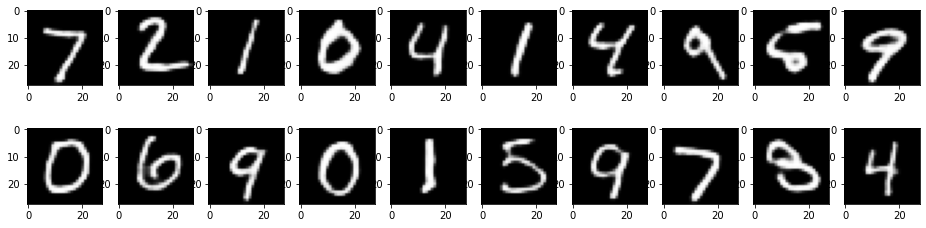

In [ ]:
visualize(pred,2,10)